In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [171]:
phones_data = pd.read_csv('./phones_data.csv')

In [172]:
phones_data

,Unnamed: 0,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
0,0,Samsung Galaxy S24 FE,"81,500.00",2024-10-03,6.7 inches,2340 x 1080 pixels,120Hz,50 MP (Triple camera),10 MP front,Exynos 2400e,8GB RAM,128GB,4700 mAh
1,1,Google Pixel 9 Pro Fold,"245,000.00",2024-09-04,8.0 inches,2152 x 2076 pixels,120Hz,48 MP (Triple camera),10 MP front,Google Tensor G4,16GB RAM,256GB,4650 mAh
2,2,OnePlus Nord 4,"57,000.00",2024-08-08,6.7 inches,2772 x 1240 pixels,120Hz,50 MP (Dual camera),16 MP front,Qualcomm Snapdragon 7+ Gen 3,8GB RAM,128GB,5500 mAh
3,3,Google Pixel 9 Pro XL,"145,000.00",2024-08-22,6.8 inches,2992 x 1344 pixels,120Hz,50 MP (Triple camera),42 MP front,Google Tensor G4,16GB RAM,128GB,5060 mAh
4,4,Huawei Pura 70 Ultra,"200,000.00",2024-04-29,6.8 inches,2844 x 1280 pixels,120Hz,50 MP (Triple camera),13 MP front,Kirin 9010,16GB RAM,512GB,5200mAh
5,5,Motorola Edge 50 Fusion,"176,000.00",2024-05-15,6.7 inches,2400 x 1080 pixels,144,50 MP (Dual camera),32 MP front,Qualcomm Snapdragon 7s Gen 3,8GB RAM,256GB,5000 mAh
6,6,Sony Xperia 1 VI,"85,000.00",2024-06-03,6.5 inches,2340 x 1080 pixels,120Hz,48 MP (Triple camera),12 MP front,Qualcomm Snapdragon 8 Gen 3,12GB RAM,256GB,5000 mAh
7,7,Xiaomi 14 Ultra,"175,000.00",2024-02-22,6.7 inches,3200 x 1440 pixels,120Hz,50 MP (Quad camera),32 MP front,Qualcomm Snapdragon 8 Gen 3,16GB RAM,512GB,5000 mAh
8,8,Honor Magic 6 Pro,"124,000.00",2024-01-18,6.8 inches,2800 x 1280 pixels,120Hz,50 MP (Triple camera),50 MP front,Snapdragon 8 Gen 3,12GB RAM,512GB,5600 mAh
9,9,Samsung Galaxy Z Fold 6,"175,000.00",2024-07-24,7.6 inches,2160 x 1856 pixels,120Hz,50 MP (Triple camera),4 MP front,Qualcomm Snapdragon 8 Gen 3 for Galaxy,12GB RAM,256GB,4400 mAh


In [173]:
# Removing Unnamed Column
phones_data.drop(columns=['Unnamed: 0'], inplace=True)

In [174]:
phones_data

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
0,Samsung Galaxy S24 FE,"81,500.00",2024-10-03,6.7 inches,2340 x 1080 pixels,120Hz,50 MP (Triple camera),10 MP front,Exynos 2400e,8GB RAM,128GB,4700 mAh
1,Google Pixel 9 Pro Fold,"245,000.00",2024-09-04,8.0 inches,2152 x 2076 pixels,120Hz,48 MP (Triple camera),10 MP front,Google Tensor G4,16GB RAM,256GB,4650 mAh
2,OnePlus Nord 4,"57,000.00",2024-08-08,6.7 inches,2772 x 1240 pixels,120Hz,50 MP (Dual camera),16 MP front,Qualcomm Snapdragon 7+ Gen 3,8GB RAM,128GB,5500 mAh
3,Google Pixel 9 Pro XL,"145,000.00",2024-08-22,6.8 inches,2992 x 1344 pixels,120Hz,50 MP (Triple camera),42 MP front,Google Tensor G4,16GB RAM,128GB,5060 mAh
4,Huawei Pura 70 Ultra,"200,000.00",2024-04-29,6.8 inches,2844 x 1280 pixels,120Hz,50 MP (Triple camera),13 MP front,Kirin 9010,16GB RAM,512GB,5200mAh
5,Motorola Edge 50 Fusion,"176,000.00",2024-05-15,6.7 inches,2400 x 1080 pixels,144,50 MP (Dual camera),32 MP front,Qualcomm Snapdragon 7s Gen 3,8GB RAM,256GB,5000 mAh
6,Sony Xperia 1 VI,"85,000.00",2024-06-03,6.5 inches,2340 x 1080 pixels,120Hz,48 MP (Triple camera),12 MP front,Qualcomm Snapdragon 8 Gen 3,12GB RAM,256GB,5000 mAh
7,Xiaomi 14 Ultra,"175,000.00",2024-02-22,6.7 inches,3200 x 1440 pixels,120Hz,50 MP (Quad camera),32 MP front,Qualcomm Snapdragon 8 Gen 3,16GB RAM,512GB,5000 mAh
8,Honor Magic 6 Pro,"124,000.00",2024-01-18,6.8 inches,2800 x 1280 pixels,120Hz,50 MP (Triple camera),50 MP front,Snapdragon 8 Gen 3,12GB RAM,512GB,5600 mAh
9,Samsung Galaxy Z Fold 6,"175,000.00",2024-07-24,7.6 inches,2160 x 1856 pixels,120Hz,50 MP (Triple camera),4 MP front,Qualcomm Snapdragon 8 Gen 3 for Galaxy,12GB RAM,256GB,4400 mAh


Release Date

In [175]:
phones_data['Release Date'] = phones_data['Release Date'].apply(lambda x: pd.to_datetime(x))

Price

In [176]:
def price(x):
    result = re.findall('\d*', x)
    a = str(result[0])
    b = str(result[2])
    return int(a + b)

phones_data['Price'] = phones_data['Price'].apply(price)

Display size


In [177]:
def display(x):
    return(float(''.join(re.findall('\d\.*', x))))

phones_data['Display Size'] = phones_data['Display Size'].apply(display)

Refresh Rate

In [178]:
def refresh(x):
    return int(re.findall('\d*', x)[0])

phones_data['Refresh Rate'] = phones_data['Refresh Rate'].apply(refresh)

Camera

In [179]:
def camera(x):
    return int(re.findall('\d*', x)[0])

phones_data['Rear Camera'] = phones_data['Rear Camera'].apply(camera)
phones_data['Front Camera'] = phones_data['Front Camera'].apply(camera)

RAM

In [180]:
phones_data[phones_data['RAM'].str.contains('0')]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
34,Nokia 8210 4G,15000,2022-07-28,2.8,320 x 240 pixels,90,8,5,Unisoc T107,0.048GB,0.128GB,1450 mAh
35,Nokia 2660 Flip,8000,2022-07-28,2.8,320 x 240 pixels,120,0,0,Unisoc T107,0.048GB,0.128GB,1450 mAh


In [181]:
def ram(x):
    return float(''.join(re.findall('\d[\.]*', x)))

phones_data['RAM'] = phones_data['RAM'].apply(ram)

Storage

In [182]:
pd.options.display.max_rows = 1000

In [183]:
phones_data.isnull().sum()

Phone_name      0
Price           0
Release Date    0
Display Size    0
Resolution      0
Refresh Rate    0
Rear Camera     0
Front Camera    0
Processor       0
RAM             0
Storage         1
Battery         0
dtype: int64

In [184]:
phones_data[phones_data['Storage'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
21,Sony Xperia 10 V,70500,2023-06-21,6.1,2520 x 1080 pixels,60,48,8,Qualcomm Snapdragon 695 5G,6.0,NaN,5000 mAh


In [185]:
phones_data.loc[phones_data['Phone_name'] == 'Sony Xperia 10 V', 'Storage'] = '128GB'

In [186]:
phones_data[phones_data['Storage'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery


In [187]:
def storage(x):
    return float(''.join(re.findall('\d[\.]*', x)))

phones_data['Storage'] = phones_data['Storage'].apply(storage)

Battery 

In [188]:
def battery(x):
    return int(''.join(re.findall('\d', x)))

phones_data['Battery'] = phones_data['Battery'].apply(battery)

Resolution

In [189]:
# Break it into px_height and px_width
width = []
height = []

def resolution(x):
    resol = re.findall('\d+', x)
    width.append(int(resol[1]))
    height.append(int(resol[0]))
    
phones_data['Resolution'].apply(resolution)

phones_data['px_width'] = width
phones_data['px_height'] = height


In [190]:
phones_data['px_height'] = phones_data['px_height'].apply(lambda x: int(x))
phones_data['px_width'] = phones_data['px_width'].apply(lambda x: int(x))

In [191]:
phones_data.drop(columns=['Resolution'], inplace=True)

Creating Brand Column

In [192]:
brands = []

def brand(x):
    brands.append(x.split()[0])

phones_data['Phone_name'].apply(brand)

phones_data['Brand'] = brands

## EDA

In [193]:
new_phones_data = {
    'Brand': [
        'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Huawei', 'Huawei', 'Huawei', 'Huawei', 'Huawei',
        'Oppo', 'Oppo', 'Oppo', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Tecno', 'Tecno', 'Tecno', 'Tecno',
        'Infinix', 'Infinix', 'Infinix', 'Nokia', 'Nokia', 'Nokia', 'Apple', 'Apple', 'Apple', 
        'Vivo', 'Vivo', 'Vivo', 'Realme', 'Realme', 'Realme', 'OnePlus', 'OnePlus', 'OnePlus', 'Google', 'Google', 
        'Itel', 'Itel', 'Itel'
    ],
    'Phone_name': [
        'Galaxy S22', 'Galaxy A52', 'Galaxy M32', 'Galaxy S21 FE', 'P50 Pro', 'Nova 9', 'Y9 Prime', 'Mate 40 Pro', 'Y7p', 
        'Reno 7', 'A74', 'Find X3', 'Redmi Note 11', 'Poco X3', 'Mi 11 Ultra', 'Spark 7', 'Camon 18', 'Phantom X', 'Pova 5', 
        'Note 11 Pro', 'Hot 10', 'Zero X', 'G10', 'G50', 'C20', 'iPhone 13', 'iPhone 12', 'iPhone SE (2020)', 
        'V21', 'Y53s', 'Y12s', 'Realme 8', 'GT Master', 'Narzo 50', 'Nord 2', '8T', '9 Pro', 'Pixel 6', 'Pixel 6a', 
        'A56', 'S17', 'P37'
    ],
    'Processor': [
        'Snapdragon 8 Gen 1', 'Snapdragon 750G', 'Helio G80', 'Exynos 2100', 
        'Kirin 9000', 'Snapdragon 778G', 'Kirin 710F', 'Kirin 9000', 
        'Kirin 710F', 'Snapdragon 778G', 'Snapdragon 662', 'Snapdragon 870', 
        'Snapdragon 680', 'Snapdragon 732G', 'Snapdragon 888', 'Helio A25', 
        'Helio G88', 'Helio G95', 'Helio G85', 'Helio G95', 'Helio G70', 
        'Helio G95', 'Unisoc SC9863A', 'Unisoc T700', 'Unisoc SC7731E', 
        'A15 Bionic', 'A14 Bionic', 'A13 Bionic', 'Dimensity 800U', 
        'Helio G80', 'Helio P35', 'Helio G95', 'Snapdragon 870', 
        'Helio G96', 'Snapdragon 870', 'Snapdragon 865', 'Snapdragon 888', 
        'Google Tensor', 'Google Tensor', 'Unisoc SC7731E', 
        'Unisoc SC9863A', 'Unisoc SC7731E'
    ],
    'Price': [
        99000, 40000, 30000, 68000, 110000, 45000, 28000, 130000, 23000, 
        60000, 30000, 90000, 25000, 20000, 105000, 13000, 25000, 35000, 18000, 
        40000, 18000, 60000, 12000, 25000, 10000, 140000, 120000, 50000, 
        35000, 29000, 20000, 28000, 60000, 25000, 50000, 65000, 90000, 70000, 50000,
        9000, 12000, 8000
    ],
    'Display Size': [
        6.1, 6.5, 6.4, 6.4, 6.6, 6.57, 6.59, 6.76, 6.39, 
        6.43, 6.5, 6.7, 6.43, 6.67, 6.81, 6.5, 6.8, 6.9, 6.95, 
        6.95, 6.78, 6.7, 6.52, 6.82, 5.45, 6.1, 6.1, 4.7, 
        6.44, 6.58, 6.51, 6.4, 6.43, 6.6, 6.43, 6.55, 6.7, 6.4, 6.1, 
        5.7, 6.6, 6.5
    ],
    'Battery': [
        3700, 4500, 5000, 4500, 4360, 4300, 4000, 4400, 4000, 
        4500, 5000, 4800, 5000, 5160, 5000, 6000, 4750, 4700, 6000, 
        5000, 5200, 4500, 5000, 5000, 3000, 3095, 2815, 1821, 
        4000, 5000, 5000, 5000, 4300, 5000, 4500, 4500, 4500, 4614, 4410, 
        4000, 5000, 5000
    ],
    'RAM': [
        8, 6, 4, 6, 8, 8, 4, 12, 4, 
        8, 6, 12, 4, 6, 12, 3, 4, 8, 6, 
        6, 4, 8, 3, 4, 2, 6, 6, 3, 
        8, 8, 4, 8, 8, 6, 8, 12, 8, 8, 6, 
        1, 2, 2
    ],
    'Storage': [
        128, 128, 128, 128, 256, 128, 128, 256, 64, 
        128, 128, 256, 128, 128, 256, 32, 128, 256, 128, 
        128, 64, 128, 64, 128, 16, 128, 64, 64, 
        128, 128, 128, 128, 128, 128, 128, 256, 128, 128, 128, 
        16, 16, 16
    ],
    'Front Camera': [
        10, 32, 20, 32, 13, 32, 16, 13, 8, 
        32, 16, 32, 13, 20, 20, 8, 16, 16, 16, 
        16, 8, 16, 8, 8, 5, 12, 12, 7, 
        44, 16, 8, 16, 32, 16, 32, 16, 16, 8, 8, 
        5, 8, 5
    ],
    'Rear Camera': [
        '50+10+12', '64+12+5+5', '64+8+2+2', '12+8+12', '50+64+13+40', '50+8+2+2', '48+8+2', '50+12+8+20', '48+8+2', 
        '64+8+2+2', '48+8+2+2', '50+13+50', '50+8+2+2', '64+8+2+2', '108+48+12', '16+2', '48+16+2', '48+13+2', '64+8+2', 
        '64+8+2+2', '48+2+2', '64+13+5+5', '48+5+2', '48+5+2', '5', '12+12', '12+12', '12', 
        '64+8+2', '64+8+2', '13+2+2', '50+8+2', '50+8', '48+16', '50+8', '48+16', '50+12', '12+12', '12+12+8', 
        '5', '5', '5'
    ],
    'Resolution': [
        '1080 x 2340', '1080 x 2400', '1080 x 2400', '1080 x 2340', '1228 x 2700', '1080 x 2340', '1080 x 2340', '1344 x 2772', '720 x 1560',
        '1080 x 2400', '1080 x 2400', '1080 x 2412', '1080 x 2400', '1080 x 2400', '1440 x 3200', '720 x 1600', '1080 x 2460', '1080 x 2340', '1080 x 2460', 
        '1080 x 2460', '720 x 1640', '1080 x 2400', '720 x 1600', '720 x 1640', '720 x 1440', '1170 x 2532', '1170 x 2532', '750 x 1334',
        '1080 x 2400', '1080 x 2340', '720 x 1600', '1080 x 2400', '1080 x 2400', '1080 x 2408', '1080 x 2400', '1080 x 2400', '1440 x 3120', '1080 x 2340', 
        '720 x 1520', '720 x 1600', '720 x 1600', '720 x 1600'
    ],
    'Refresh Rate': [
    120, 90, 90, 120, 120, 120, 60, 90, 60,
    90, 90, 120, 90, 120, 120, 90, 120, 120, 120,
    120, 60, 90, 60, 90, 60, 60, 60, 60,
    90, 90, 60, 120, 120, 90, 120, 120, 90, 60, 60,
    60, 60, 60
    ],
    'Release Date':[
    2022,
    2021,
    2021,
    2022,
    2021,
    2021,
    2019,
    2020,
    2020,
    2021,
    2022,
    2021,
    2022,
    2020,
    2021,
    2021,
    2021,
    2021,
    2022,
    2022,
    2020,
    2021,
    2021,
    2021,
    2021,
    2021,
    2020,
    2020,
    2021,
    2021,
    2021,
    2021,
    2021,
    2022,
    2021,
    2020,
    2021,
    2021,
    2022,
    2022,
    2021,
    2021
]
}

phones_df = pd.DataFrame(new_phones_data)

In [194]:
phones_df

,Brand,Phone_name,Processor,Price,Display Size,Battery,RAM,Storage,Front Camera,Rear Camera,Resolution,Refresh Rate,Release Date
0,Samsung,Galaxy S22,Snapdragon 8 Gen 1,99000,6.10,3700,8,128,10,50+10+12,1080 x 2340,120,2022
1,Samsung,Galaxy A52,Snapdragon 750G,40000,6.50,4500,6,128,32,64+12+5+5,1080 x 2400,90,2021
2,Samsung,Galaxy M32,Helio G80,30000,6.40,5000,4,128,20,64+8+2+2,1080 x 2400,90,2021
3,Samsung,Galaxy S21 FE,Exynos 2100,68000,6.40,4500,6,128,32,12+8+12,1080 x 2340,120,2022
4,Huawei,P50 Pro,Kirin 9000,110000,6.60,4360,8,256,13,50+64+13+40,1228 x 2700,120,2021
5,Huawei,Nova 9,Snapdragon 778G,45000,6.57,4300,8,128,32,50+8+2+2,1080 x 2340,120,2021
6,Huawei,Y9 Prime,Kirin 710F,28000,6.59,4000,4,128,16,48+8+2,1080 x 2340,60,2019
7,Huawei,Mate 40 Pro,Kirin 9000,130000,6.76,4400,12,256,13,50+12+8+20,1344 x 2772,90,2020
8,Huawei,Y7p,Kirin 710F,23000,6.39,4000,4,64,8,48+8+2,720 x 1560,60,2020
9,Oppo,Reno 7,Snapdragon 778G,60000,6.43,4500,8,128,32,64+8+2+2,1080 x 2400,90,2021


In [195]:
phones_df['Rear Camera'] = phones_df['Rear Camera'].apply(lambda x: int(re.findall('\d*', x)[0]))
phones_df['px_width'] = phones_df['Resolution'].apply(lambda x: int(re.findall('\d*', x)[0]))
phones_df['px_height'] = phones_df['Resolution'].apply(lambda x: int(re.findall('\d*', x)[4]))
phones_df['RAM'] = phones_df['RAM'].apply(lambda x: float(x))
phones_df['Storage'] = phones_df['Storage'].apply(lambda x: float(x))
phones_df['Release Date'] = pd.to_datetime(phones_df['Release Date'], format='%Y')
phones_df.drop(columns=['Resolution'], inplace=True)
phones_df.loc[phones_df['Rear Camera'] == 108, 'Rear Camera'] = 50

In [196]:
phones_data = pd.concat([phones_data, phones_df], ignore_index=True)

In [197]:
phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Phone_name    115 non-null    object        
 1   Price         115 non-null    int64         
 2   Release Date  115 non-null    datetime64[ns]
 3   Display Size  115 non-null    float64       
 4   Refresh Rate  115 non-null    int64         
 5   Rear Camera   115 non-null    int64         
 6   Front Camera  115 non-null    int64         
 7   Processor     115 non-null    object        
 8   RAM           115 non-null    float64       
 9   Storage       115 non-null    float64       
 10  Battery       115 non-null    int64         
 11  px_width      115 non-null    int64         
 12  px_height     115 non-null    int64         
 13  Brand         115 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 12.7+ KB


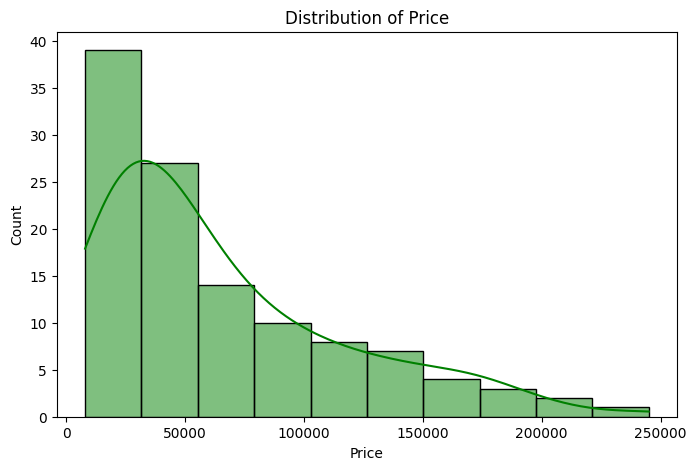

In [198]:
# Distribution of Price

plt.figure(figsize=(8, 5))
sns.histplot(phones_data['Price'], kde=True, color='green')
plt.title('Distribution of Price')
plt.show()

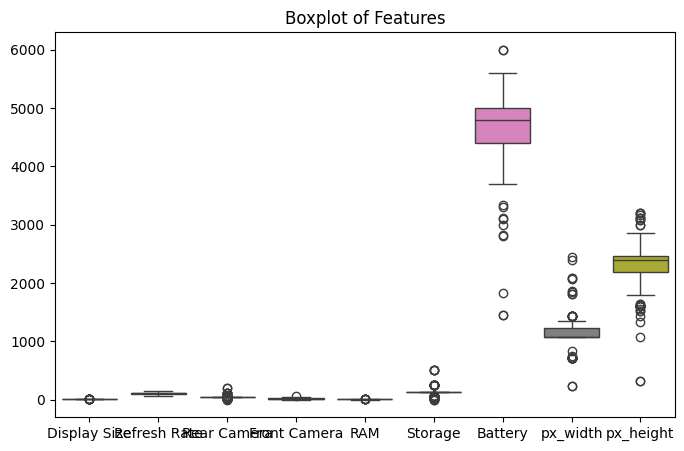

In [199]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=phones_data.drop(columns=['Price']))
plt.title('Boxplot of Features')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15692\1467268156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAM', data=phones_data, palette='Set2')


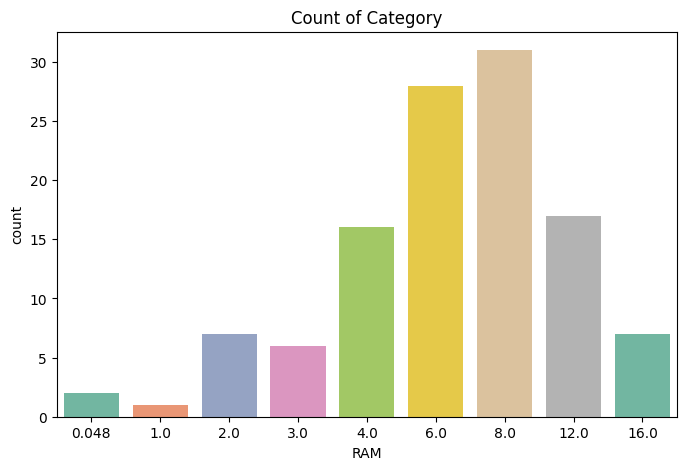

In [200]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RAM', data=phones_data, palette='Set2')
plt.title('Count of Category')
plt.show()

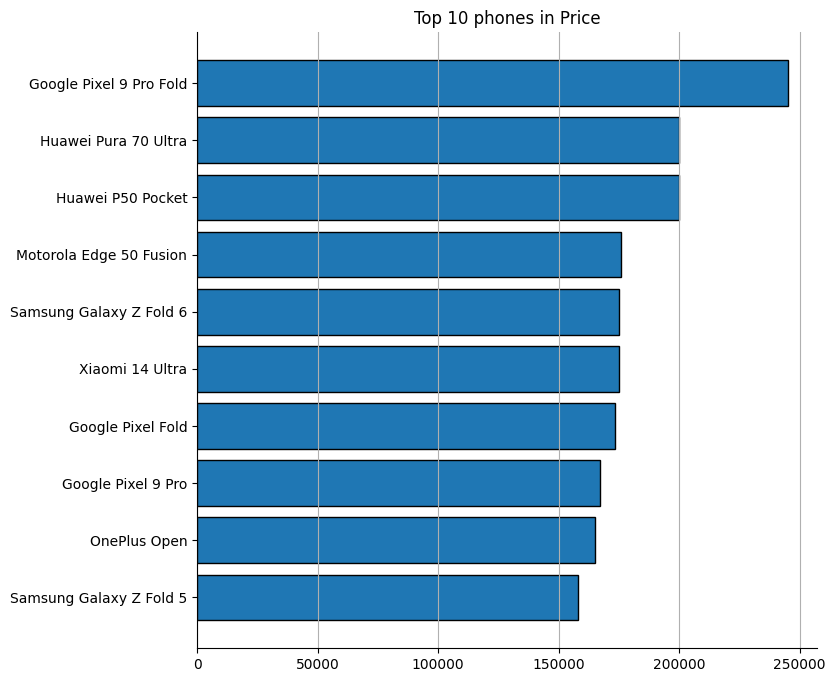

In [201]:
plt.figure(figsize=(8,8))
price_sort = phones_data.sort_values(by='Price').tail(10)
price_sort
plt.barh(price_sort['Phone_name'], price_sort['Price'], ec='black')

plt.title('Top 10 phones in Price')
plt.grid(axis='x')

sns.despine()

plt.show()


Storage

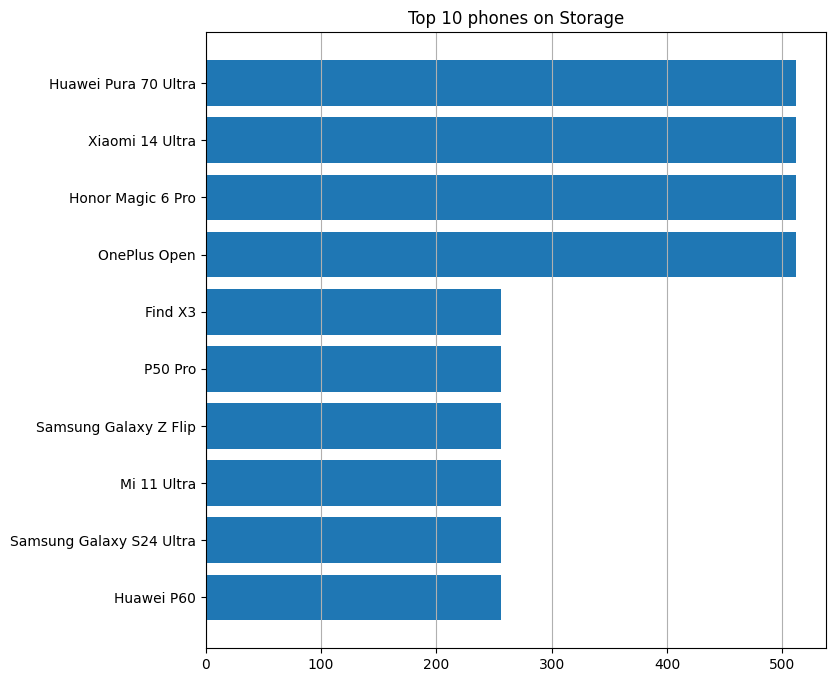

In [202]:
# Storage Ordering
plt.figure(figsize=(8,8))

storage_sort = phones_data.sort_values(by='Storage').tail(10)

plt.barh(storage_sort['Phone_name'], storage_sort['Storage'])
plt.title('Top 10 phones on Storage')

plt.grid(axis='x')
plt.show()

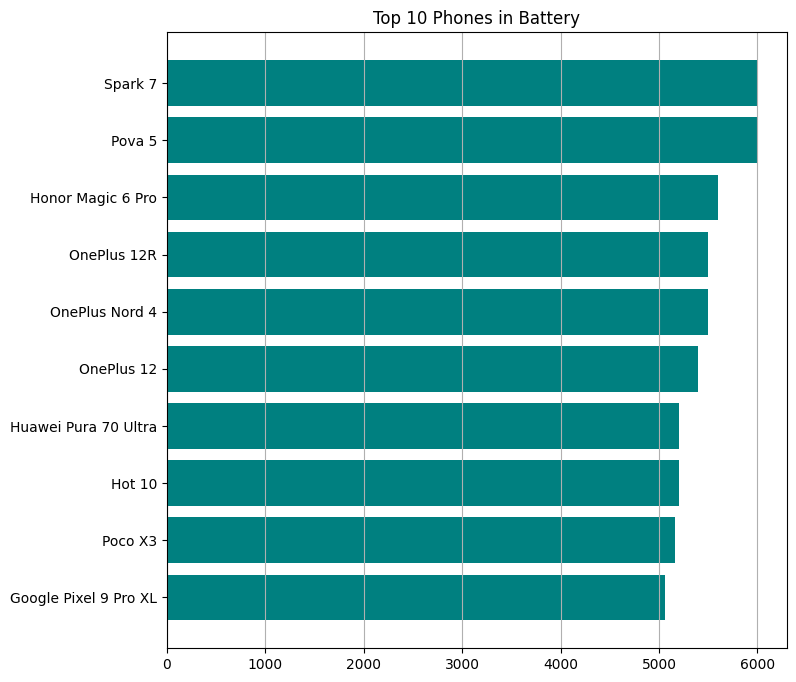

In [203]:
## Battery

battery_sort = phones_data.sort_values(by='Battery').tail(10)

plt.figure(figsize=(8,8))

plt.barh(battery_sort['Phone_name'], battery_sort['Battery'], color='teal')

plt.title('Top 10 Phones in Battery')
plt.grid(axis='x')

plt.show()

In [204]:
phones_data

,Phone_name,Price,Release Date,Display Size,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery,px_width,px_height,Brand
0,Samsung Galaxy S24 FE,81500,2024-10-03,6.70,120,50,10,Exynos 2400e,8.000,128.000,4700,1080,2340,Samsung
1,Google Pixel 9 Pro Fold,245000,2024-09-04,8.00,120,48,10,Google Tensor G4,16.000,256.000,4650,2076,2152,Google
2,OnePlus Nord 4,57000,2024-08-08,6.70,120,50,16,Qualcomm Snapdragon 7+ Gen 3,8.000,128.000,5500,1240,2772,OnePlus
3,Google Pixel 9 Pro XL,145000,2024-08-22,6.80,120,50,42,Google Tensor G4,16.000,128.000,5060,1344,2992,Google
4,Huawei Pura 70 Ultra,200000,2024-04-29,6.80,120,50,13,Kirin 9010,16.000,512.000,5200,1280,2844,Huawei
5,Motorola Edge 50 Fusion,176000,2024-05-15,6.70,144,50,32,Qualcomm Snapdragon 7s Gen 3,8.000,256.000,5000,1080,2400,Motorola
6,Sony Xperia 1 VI,85000,2024-06-03,6.50,120,48,12,Qualcomm Snapdragon 8 Gen 3,12.000,256.000,5000,1080,2340,Sony
7,Xiaomi 14 Ultra,175000,2024-02-22,6.70,120,50,32,Qualcomm Snapdragon 8 Gen 3,16.000,512.000,5000,1440,3200,Xiaomi
8,Honor Magic 6 Pro,124000,2024-01-18,6.80,120,50,50,Snapdragon 8 Gen 3,12.000,512.000,5600,1280,2800,Honor
9,Samsung Galaxy Z Fold 6,175000,2024-07-24,7.60,120,50,4,Qualcomm Snapdragon 8 Gen 3 for Galaxy,12.000,256.000,4400,1856,2160,Samsung


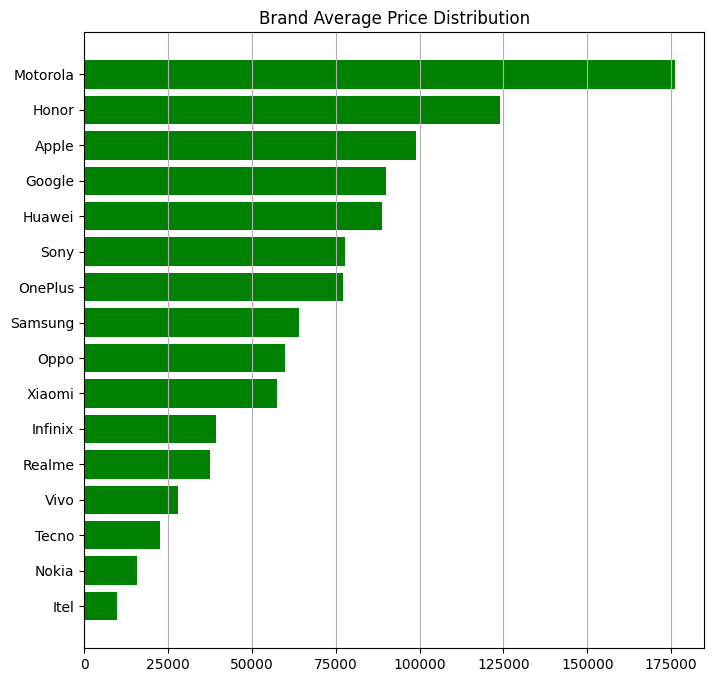

In [205]:
# Average Price for brands

brand_price = phones_data.groupby(by='Brand')['Price'].mean()
brand_price = brand_price.sort_values()

plt.figure(figsize=(8,8))

plt.barh(brand_price.index, brand_price, color='green')

plt.grid(axis='x')
plt.title('Brand Average Price Distribution')
plt.show()

Release Date and price

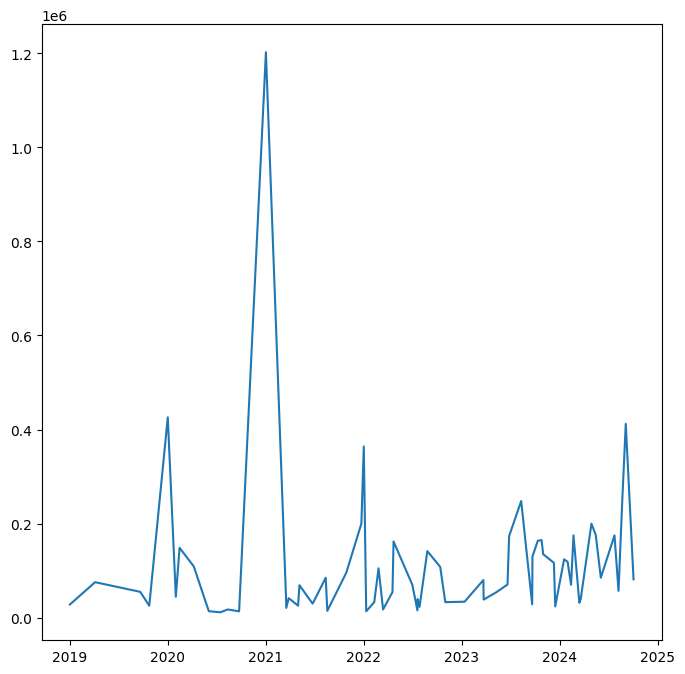

In [206]:
release_group = phones_data.groupby(by='Release Date').sum()
 
plt.figure(figsize=(8,8))

plt.plot(release_group['Price'])

plt.show()

In [207]:
phones_data[phones_data['Brand'] == 'Motorola']

,Phone_name,Price,Release Date,Display Size,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery,px_width,px_height,Brand
5,Motorola Edge 50 Fusion,176000,2024-05-15,6.7,144,50,32,Qualcomm Snapdragon 7s Gen 3,8.0,256.0,5000,1080,2400,Motorola


In [208]:
numerical_columns = ['Price', ]

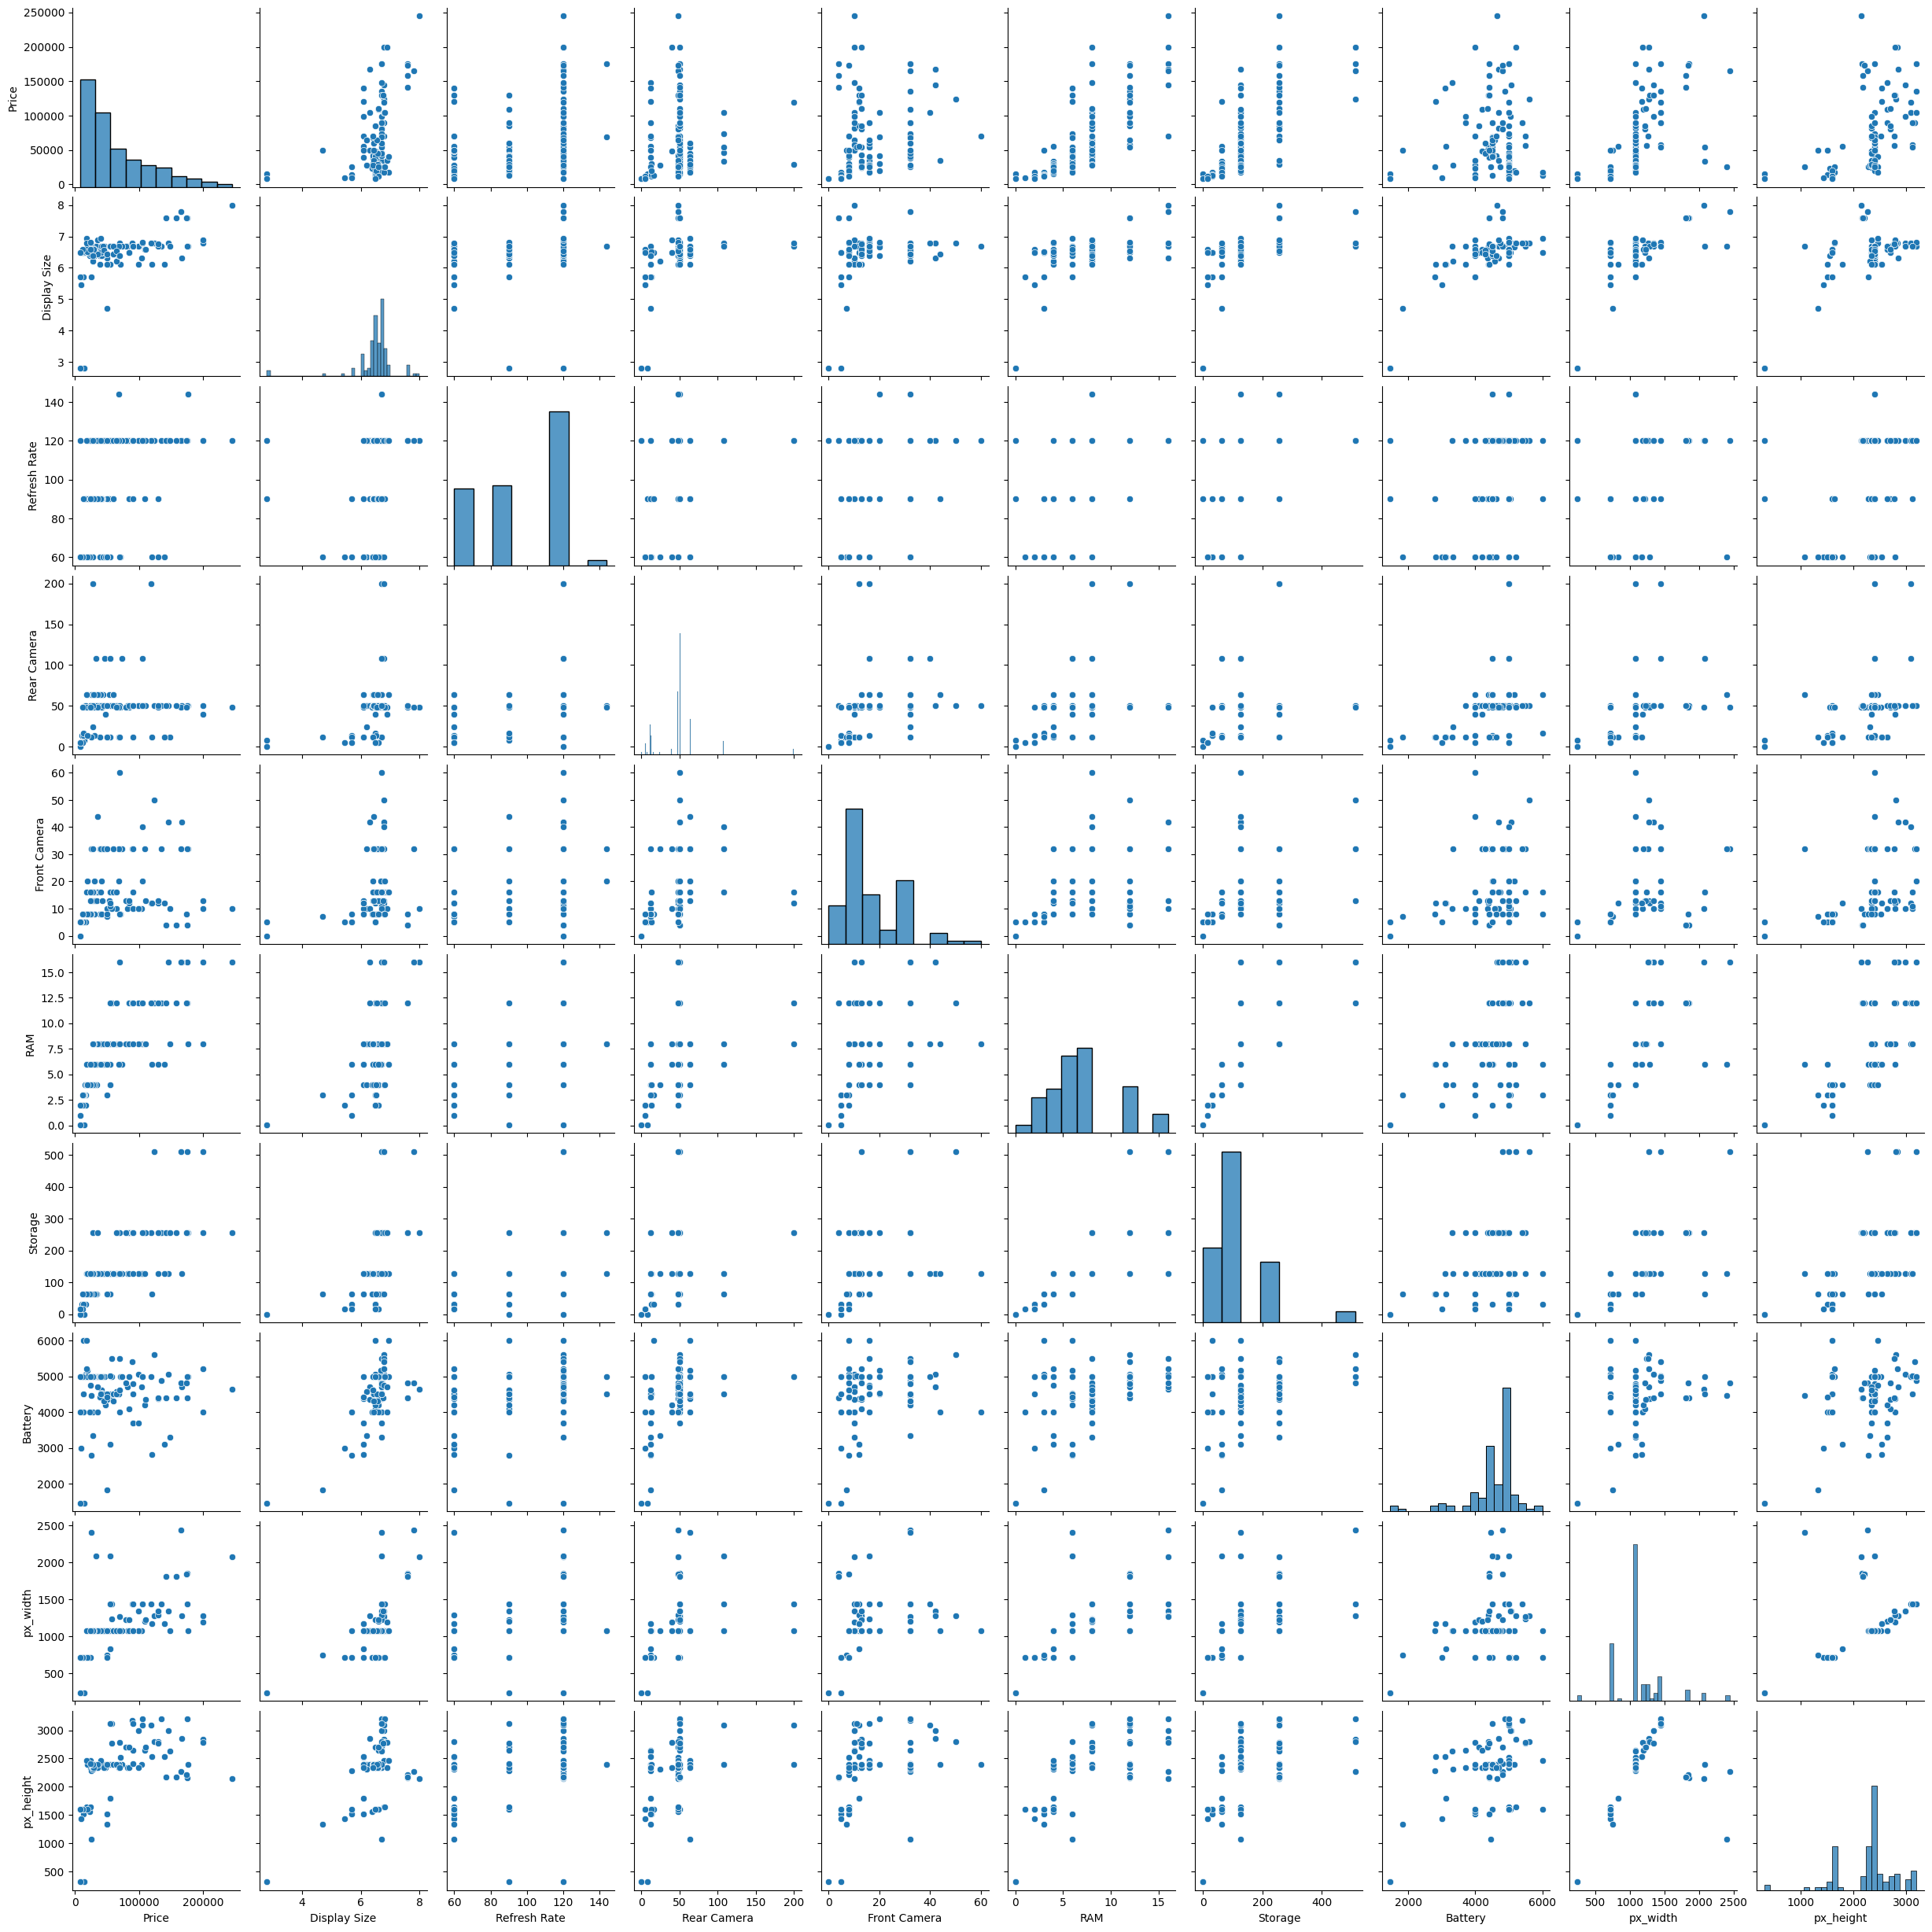

In [209]:
sns.pairplot(phones_data)

Relation btn RAM and Price

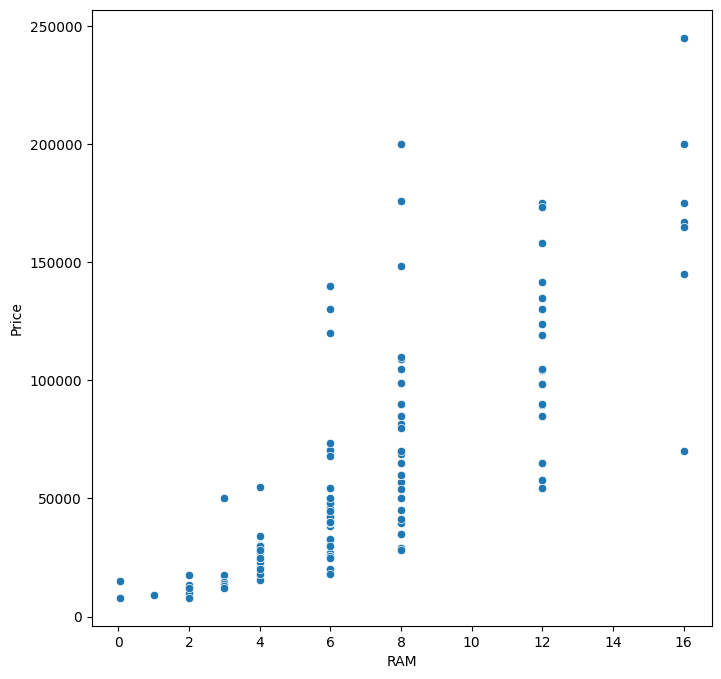

In [210]:
## RAM and Price

plt.figure(figsize=(8,8))

sns.scatterplot(data=phones_data, x='RAM', y='Price')

plt.show()

There are elements of increase in price with RAM

Battery and Price

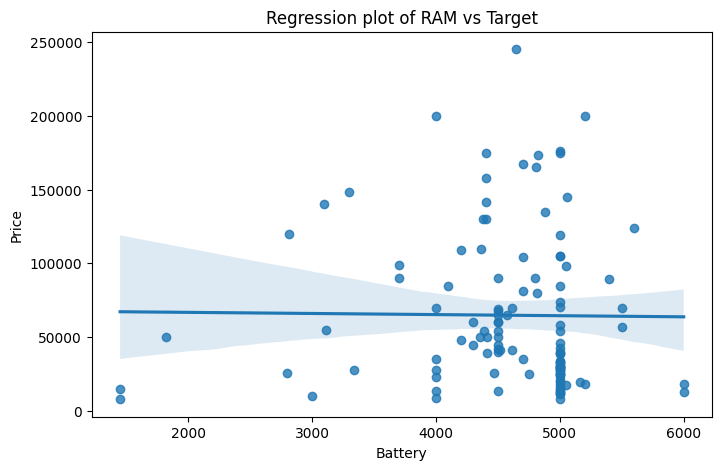

In [211]:
## Battery and Price

plt.figure(figsize=(8, 5))
sns.regplot(x='Battery', y='Price', data=phones_data)
plt.title('Regression plot of RAM vs Target')
plt.show()

Storage and Price

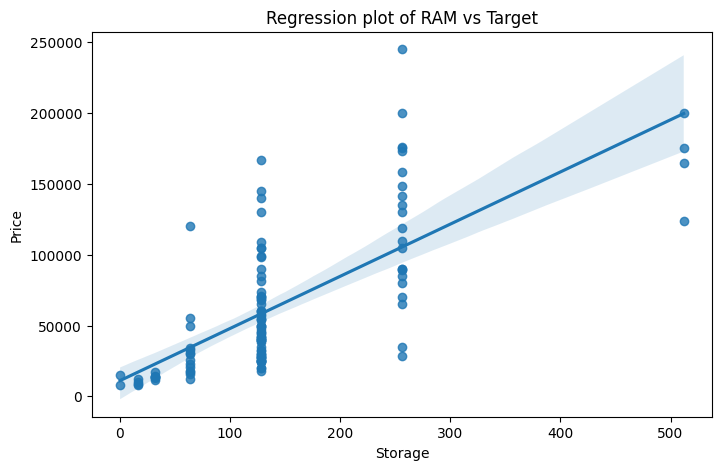

In [212]:

plt.figure(figsize=(8, 5))
sns.regplot(x='Storage', y='Price', data=phones_data)
plt.title('Regression plot of RAM vs Target')
plt.show()

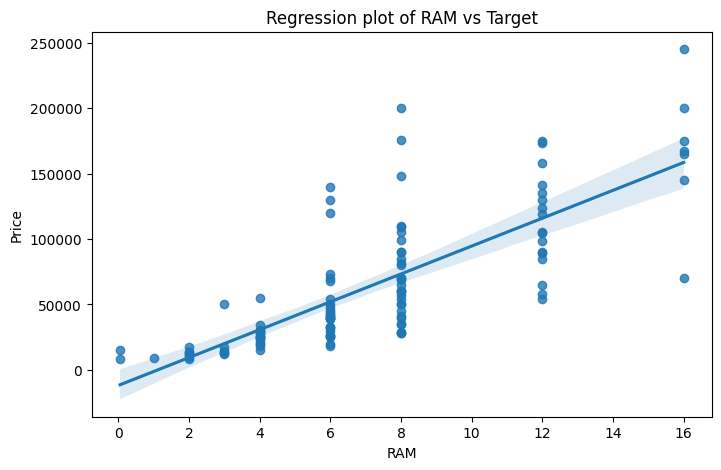

In [213]:
# Regression plot to see linear relationships
plt.figure(figsize=(8, 5))
sns.regplot(x='RAM', y='Price', data=phones_data)
plt.title('Regression plot of RAM vs Target')
plt.show()

In [214]:
phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Phone_name    115 non-null    object        
 1   Price         115 non-null    int64         
 2   Release Date  115 non-null    datetime64[ns]
 3   Display Size  115 non-null    float64       
 4   Refresh Rate  115 non-null    int64         
 5   Rear Camera   115 non-null    int64         
 6   Front Camera  115 non-null    int64         
 7   Processor     115 non-null    object        
 8   RAM           115 non-null    float64       
 9   Storage       115 non-null    float64       
 10  Battery       115 non-null    int64         
 11  px_width      115 non-null    int64         
 12  px_height     115 non-null    int64         
 13  Brand         115 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 12.7+ KB


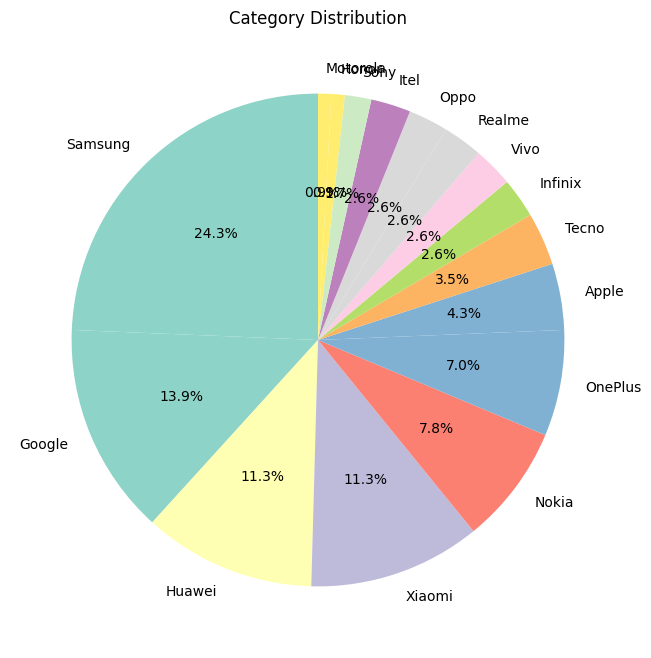

In [215]:
phones_data['Brand'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), cmap='Set3')
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

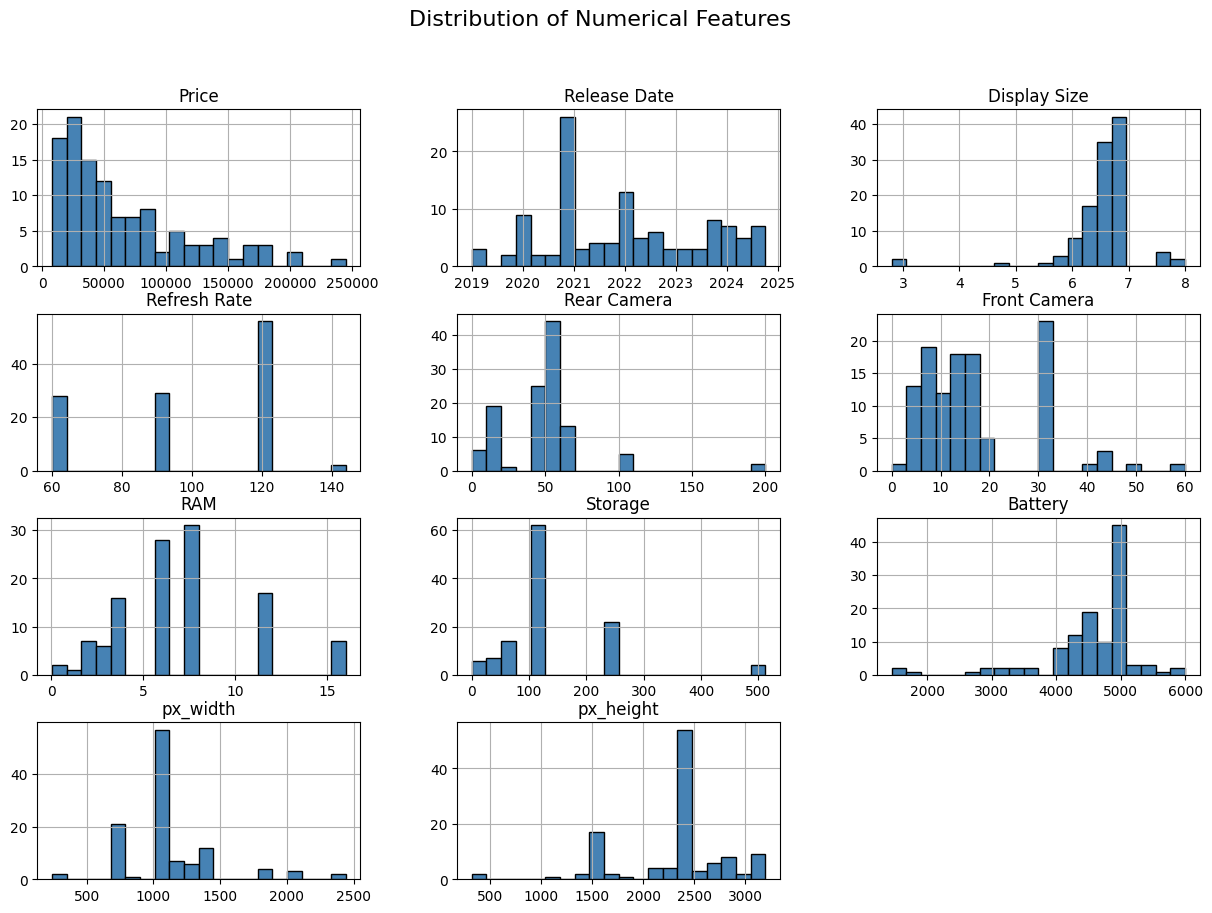

In [216]:
phones_data.hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

Price seems to Increase with Storage

In [217]:
phones_data.to_csv('final_data.csv')

In [218]:
data = pd.read_csv('./final_data.csv')

In [219]:
brand = 'Samsung  '

In [223]:
phones_data[phones_data['Release Date'] > pd.Timestamp(2000)]

,Phone_name,Price,Release Date,Display Size,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery,px_width,px_height,Brand
0,Samsung Galaxy S24 FE,81500,2024-10-03,6.70,120,50,10,Exynos 2400e,8.000,128.000,4700,1080,2340,Samsung
1,Google Pixel 9 Pro Fold,245000,2024-09-04,8.00,120,48,10,Google Tensor G4,16.000,256.000,4650,2076,2152,Google
2,OnePlus Nord 4,57000,2024-08-08,6.70,120,50,16,Qualcomm Snapdragon 7+ Gen 3,8.000,128.000,5500,1240,2772,OnePlus
3,Google Pixel 9 Pro XL,145000,2024-08-22,6.80,120,50,42,Google Tensor G4,16.000,128.000,5060,1344,2992,Google
4,Huawei Pura 70 Ultra,200000,2024-04-29,6.80,120,50,13,Kirin 9010,16.000,512.000,5200,1280,2844,Huawei
5,Motorola Edge 50 Fusion,176000,2024-05-15,6.70,144,50,32,Qualcomm Snapdragon 7s Gen 3,8.000,256.000,5000,1080,2400,Motorola
6,Sony Xperia 1 VI,85000,2024-06-03,6.50,120,48,12,Qualcomm Snapdragon 8 Gen 3,12.000,256.000,5000,1080,2340,Sony
7,Xiaomi 14 Ultra,175000,2024-02-22,6.70,120,50,32,Qualcomm Snapdragon 8 Gen 3,16.000,512.000,5000,1440,3200,Xiaomi
8,Honor Magic 6 Pro,124000,2024-01-18,6.80,120,50,50,Snapdragon 8 Gen 3,12.000,512.000,5600,1280,2800,Honor
9,Samsung Galaxy Z Fold 6,175000,2024-07-24,7.60,120,50,4,Qualcomm Snapdragon 8 Gen 3 for Galaxy,12.000,256.000,4400,1856,2160,Samsung
